In [92]:
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np
import time
from tqdm import tqdm
import random
import enchant
from nltk.corpus import words as nltkwords
setofwords = set(nltkwords.words())

In [117]:
since = time.time()
model = KeyedVectors.load_word2vec_format('models/1200_1507.txt')
print(f'Time taken : {int(time.time()-since)}')

Time taken : 10


In [118]:
en1_dict = enchant.Dict('en_US')
en2_dict = enchant.Dict('en_UK')

In [119]:
'angelology' in nltkwords.words()

True

In [121]:
vectors = model.wv

C:\Users\Owner\Anaconda3\envs\cs231n\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [122]:
def valid_key(key):
    if len(key)<3:
        return False
    elif not(nltk.pos_tag([key])[0][1]=='NN'):
        return False
    elif not(key.isalpha()) :
        return False
#     elif not(en1_dict.check(key)) and not(en2_dict.check(key)) and not(key in setofwords):
#         return False
    return True

In [123]:
sample_key = 'poppyseed'
print(sample_key in setofwords)
print(valid_key(sample_key))

False
True


In [124]:
since = time.time()
clustering_keys = [key for key in list(vectors.vocab.keys()) if valid_key(key)]
clustering_vecs = [vectors[key] for key in clustering_keys]
clustering_array = np.array(clustering_vecs)
print(f'Time taken : {int(time.time()-since)}')

Time taken : 17


In [125]:
print(len(clustering_keys))
x = 0
print(clustering_keys[x:x+300])

7121
['climate', 'change', 'ocean', 'ipcc', 'acidification', 'carbon', 'report', 'assessment', 'energy', 'resilience', 'development', 'system', 'scenario', 'research', 'group', 'meeting', 'land', 'expert', 'sea', 'radiative', 'marine', 'adaptation', 'level', 'time', 'human', 'figure', 'future', 'ice', 'temperature', 'use', 'ecosystem', 'model', 'range', 'community', 'capacity', 'key', 'mitigation', 'water', 'surface', 'rcps', 'increase', 'policy', 'risk', 'information', 'response', 'provide', 'workshop', 'impact', 'include', 'university', 'need', 'process', 'table', 'management', 'anthropogenic', 'chapter', 'contribution', 'food', 'knowledge', 'greenhouse', 'concentration', 'set', 'variability', 'coastal', 'emission', 'bog', 'iam', 'summary', 'consistent', 'panel', 'analysis', 'scale', 'stabilization', 'relevant', 'image', 'governance', 'past', 'number', 'discussion', 'science', 'state', 'calcification', 'dioxide', 'mean', 'evidence', 'world', 'review', 'breakout', 'literature', 'term'

In [126]:
inertia_vals = {}

<IPython.core.display.Javascript object>


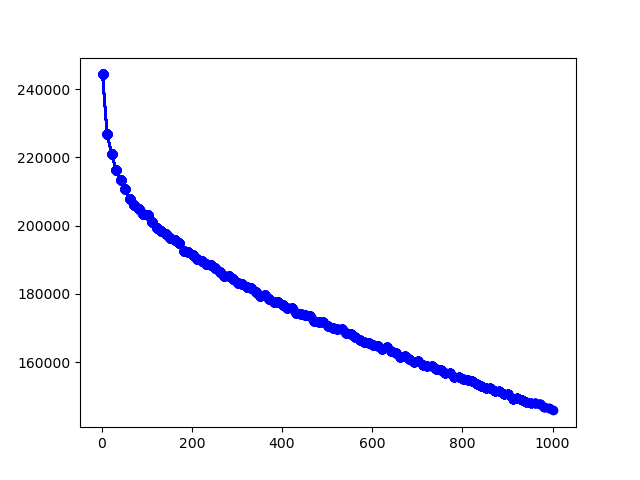

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [55:58<00:00, 33.25s/it]


In [127]:
k_list = range(2,1010,10)
%matplotlib notebook

import matplotlib.pyplot as plt
import time

fig,ax = plt.subplots(1,1)
plt.autoscale()
for k in tqdm(k_list):
    kmeans_obj = KMeans(n_clusters=k,n_init=3,random_state=int(100*random.random()))
    kmeans_obj.fit(clustering_array)
    inertia_vals[k] = kmeans_obj.inertia_
    ax.plot(list(inertia_vals.keys()),list(inertia_vals.values()),'bo-')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


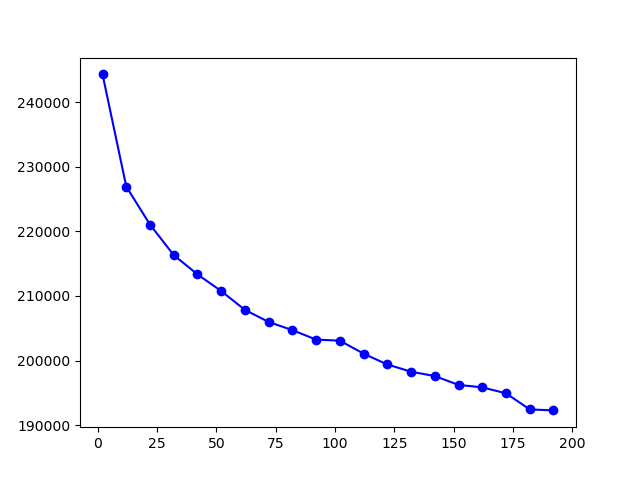

In [131]:
fig,ax = plt.subplots(1,1)
ax.plot(list(inertia_vals.keys())[:20],list(inertia_vals.values())[:20],'bo-')
plt.show()

In [132]:
num_clusters = 75
since = time.time()
final_kmeans_obj = KMeans(n_clusters=num_clusters,n_init=3,random_state=int(100*random.random()))
final_kmeans_data = final_kmeans_obj.fit_predict(clustering_array)
print(f'Time taken : {int(time.time()-since)} seconds')

Time taken : 6 seconds


In [133]:
key_clusters = {key:cluster for key,cluster in zip(clustering_keys,final_kmeans_data)}

In [134]:
climate_cluster = [keys for keys in clustering_keys if key_clusters[keys]==key_clusters['climate']]
print(len(climate_cluster))

73


In [135]:
print(climate_cluster,end=" ")

['climate', 'temperature', 'surface', 'earth', 'heat', 'snow', 'cloud', 'soil', 'cold', 'warm', 'shallow', 'ambient', 'warmer', 'disturbance', 'sediment', 'layer', 'moisture', 'wind', 'dust', 'thaw', 'tolerant', 'melt', 'dry', 'smooth', 'cool', 'humidity', 'salt', 'shallower', 'stream', 'cooler', 'slope', 'sunlight', 'bubbling', 'thick', 'mixture', 'wet', 'sparse', 'fluid', 'thin', 'drizzle', 'coarse', 'drain', 'wetter', 'richer', 'vent', 'visibility', 'texture', 'farther', 'drift', 'moist', 'ash', 'brittle', 'smell', 'denser', 'shade', 'haze', 'icy', 'periphery', 'heavier', 'scatter', 'equator', 'thicker', 'warmth', 'convection', 'drier', 'darker', 'brighter', 'lighter', 'cloudy', 'terrain', 'thinner', 'ample', 'dense'] 

In [136]:
cluster_dict = {}
for i in range(1,num_clusters+1):
    cluster_dict[i]=[]

In [137]:
for key,cluster in key_clusters.items():
    cluster_dict[cluster+1].append(key)

In [138]:
print(key_clusters['climate'])

20


In [139]:
with open('cluster_groups.txt','w',encoding='utf-8') as f:
    for i in range(1,76):
        f.write(f'cluster_id : {i} \n')
        for key in cluster_dict[i]:
            key_write = key+" "
            f.write(key_write)
        f.write('\n')
        f.write('-'*50)
        f.write('\n')
        f.write('-'*50)
        f.write('\n')

In [140]:
print(valid_key('coster'))

True
